In [31]:
%load_ext autoreload
%autoreload 2
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import open3d as o3d
from tqdm import tqdm

import events_utils.filter as flt
import events_utils.visualize as vis
import events_utils.time_difference as td
import events_utils.time_difference_2d as td2d
import events_utils.tum_vie as tum_dset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
#define time range
t_start = 0.5
duration = 0.2
t_end = t_start + duration
shape = (180, 240)

In [33]:
events_raw = np.loadtxt(path + "data/sim/events.txt")

In [34]:
events_t = flt.filter_time(events_raw, t_start, t_end)

In [35]:
# patch_center = (170, 42)
# patch_size = 10
patch_center = (90, 90)
patch_size = 180
shape = (patch_size, patch_size)
events_p = flt.filter_patch(events_t, patch_center, patch_size)

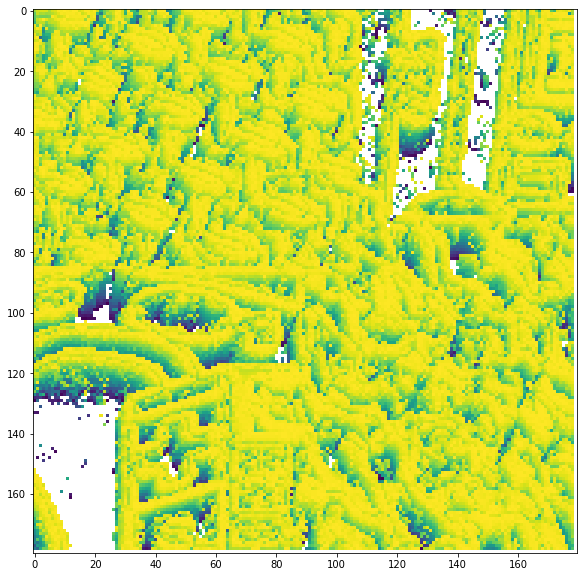

In [36]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events_p, shape, filter_polarity=False, polarity=1)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

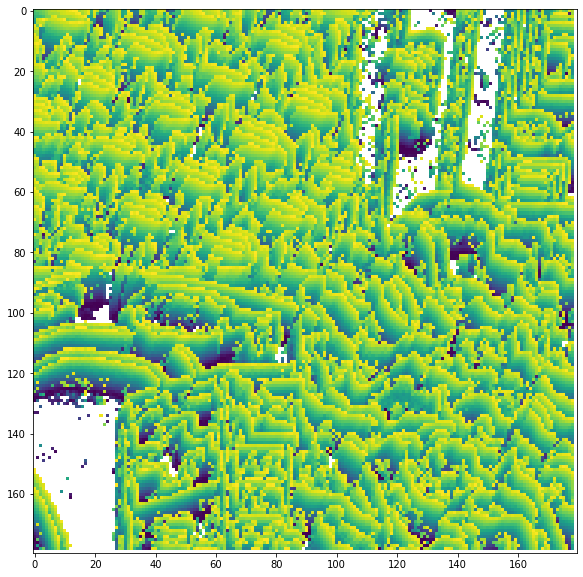

In [43]:
events = flt.filter_refract(events_p, 0.1)
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events, shape, filter_polarity=False, polarity=0)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

In [86]:
calib = np.loadtxt(path + "data/sim/calib.txt")

In [87]:
poses = np.loadtxt(path + "data/sim/groundtruth.txt")

In [88]:
time_d = td2d.TimeDifference2d(shape, events, poses, calib[0])

(2, 1999)


In [245]:
final_td, td_predictions, U, V, diff_list = time_d.compute_time_difference(dist = 2, px_range_pred=9, delay=0.19, avg_n=10, std_mul=0.005, debug=True, start_delay=0.05)

[0. 0. 0.]


100%|█████████████████████████████████████████████████████████████████████████| 85622/85622 [00:08<00:00, 10165.08it/s]

total: 85622
diff: 3204
negative: 1393
q: 0
ang: 0
ind: 13328
img: 22101
filtered: 0


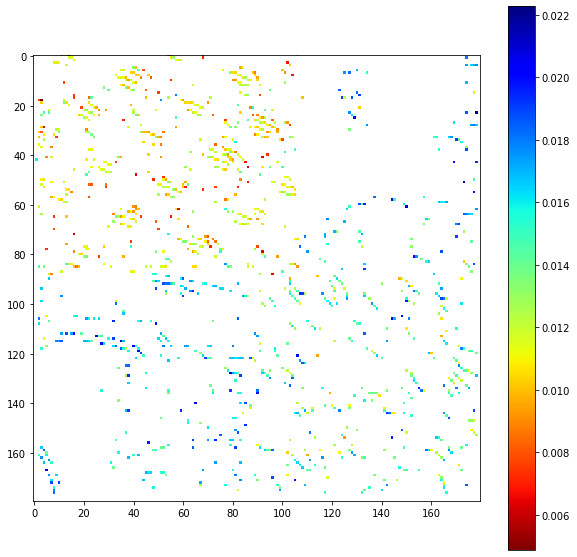

In [246]:
%matplotlib inline
plt.figure(figsize=(10, 10))
final_td_m = np.ma.masked_where(final_td == 0, final_td)
m = plt.imshow(final_td_m, cmap="jet_r", interpolation="none")
plt.colorbar(m)

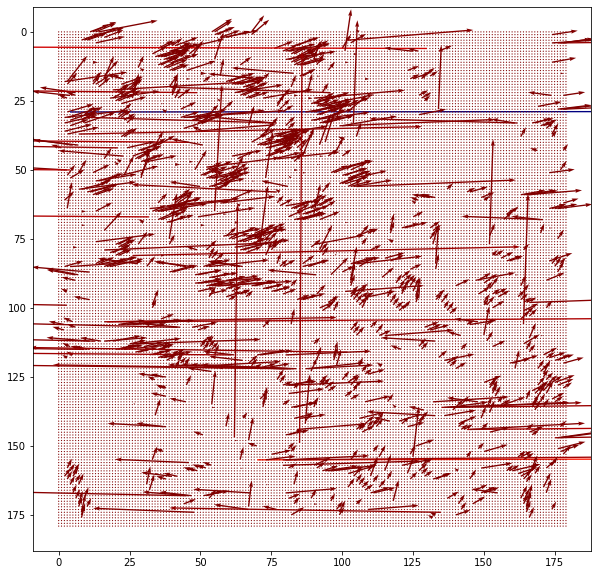

In [247]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.quiver(U, V, np.sqrt(U**2 + V**2), cmap="jet_r")
plt.gca().invert_yaxis()

In [248]:
U[0, 6]

0.0

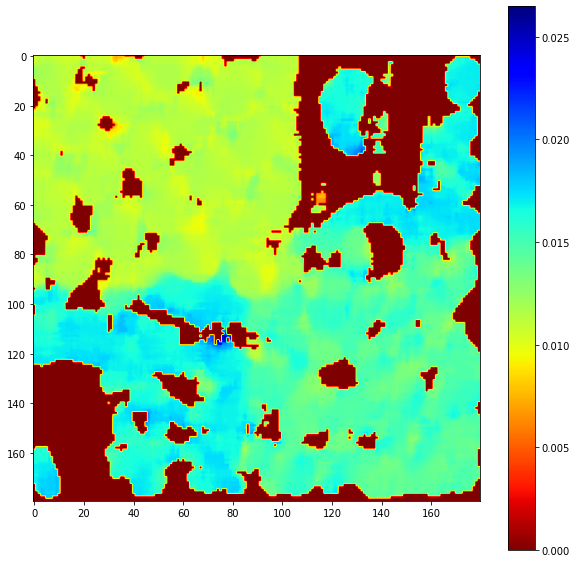

In [249]:
%matplotlib inline
img, count = td.median_from_dict(td_predictions, shape, 20)

plt.figure(figsize=(10, 10))
m = plt.imshow(img, cmap="jet_r")
plt.colorbar(m)

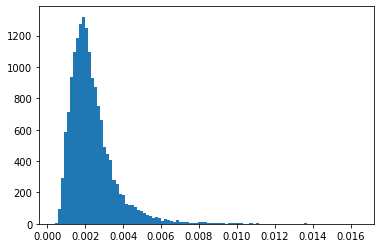

In [250]:
plt.hist(diff_list, 100);

In [251]:
u = np.divide(1.0, final_td_m, where=final_td!=0.0)
d = td.td2depth_slider(u)

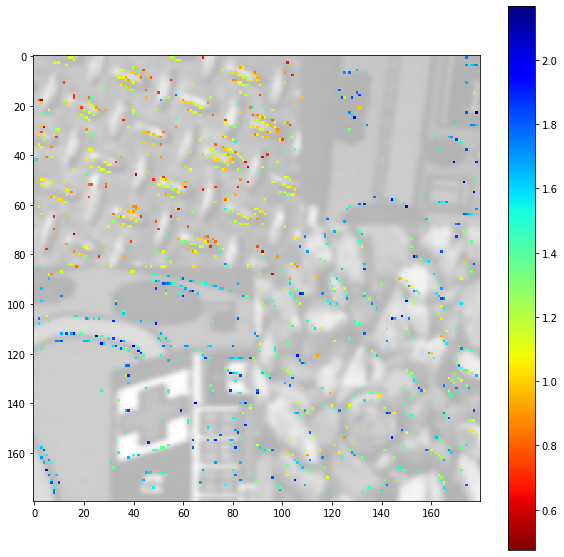

In [252]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img_gray = plt.imread(path + "data/sim/images/frame_00000027.png")
plt.imshow(img_gray, alpha=0.3, cmap="gray")
m = plt.imshow(d, cmap="jet_r", interpolation="none")
plt.colorbar(m)

In [253]:
%matplotlib qt
vis.visualize3d(d, range=(0.8, 1.8))